### 3 Factor Fama French Model

Ref: CFAI Text, Quantitative Methods, LM 1

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

In [10]:
# Importing the data

df = pd.read_csv('famafrench.csv')

In [11]:
df.head()

,Date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [15]:
# Cleaning up the dates

df['Date'] = pd.to_datetime(df['Date'],format='%Y%m')

df.head()

,Date,Mkt-RF,SMB,HML,RF
0,1926-07-01,2.96,-2.56,-2.43,0.22
1,1926-08-01,2.64,-1.17,3.82,0.25
2,1926-09-01,0.36,-1.40,0.13,0.23
3,1926-10-01,-3.24,-0.09,0.70,0.32
4,1926-11-01,2.53,-0.10,-0.51,0.31


In [16]:
# Filtering Dates from 2013-07-01 to 2023-07-01

df = df.loc[(df['Date'] >= '2013-07-01') & (df['Date'] < '2023-07-01')]
df.tail()

,Date,Mkt-RF,SMB,HML,RF
1159,2023-02-01,-2.58,1.17,-0.81,0.34
1160,2023-03-01,2.51,-5.51,-8.85,0.36
1161,2023-04-01,0.61,-3.35,-0.04,0.35
1162,2023-05-01,0.35,1.61,-7.72,0.36
1163,2023-06-01,6.46,1.54,-0.26,0.40


#### Scatter Plot Matrix

/Users/sneiden/Environments/dataanalysis/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


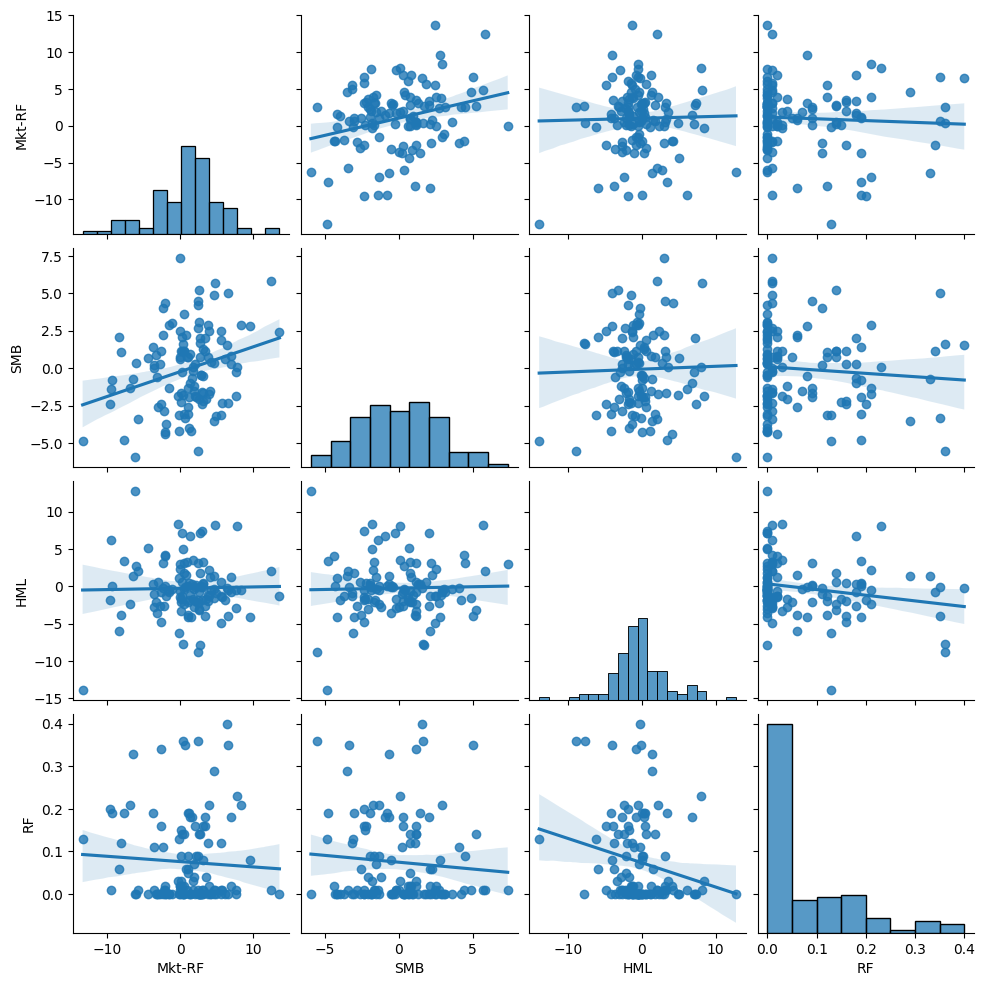

In [17]:
# Generating a Scatter Matrix with regressions lines 

scatterplot_matrix = sns.pairplot(df, kind='reg')
scatterplot_matrix

In [21]:
# Renaming coloum for better model specification 

df = df.rename(columns={'Mkt-RF':'ER'})
df.head()

,Date,ER,SMB,HML,RF
1044,2013-07-01,5.65,1.87,0.57,0.0
1045,2013-08-01,-2.71,0.27,-2.69,0.0
1046,2013-09-01,3.77,2.88,-1.22,0.0
1047,2013-10-01,4.18,-1.53,1.25,0.0
1048,2013-11-01,3.13,1.29,0.32,0.0


#### Fitting an OLS Model to the data

In [28]:
# Generating the regression output 

model = ols('RF~ ER+SMB+HML', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RF   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.060
Date:                Mon, 16 Oct 2023   Prob (F-statistic):              0.109
Time:                        21:24:01   Log-Likelihood:                 108.58
No. Observations:                 120   AIC:                            -209.2
Df Residuals:                     116   BIC:                            -198.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0741      0.009      7.906      0.000       0.056       0.093
ER            -0.0007      0.002     -0.330      0.742      -0.005       0.004
SMB           -0.0027      0.004     -0.748      0.456      -0.010       0.004
HML           -0.0056      0.002     -2.274      0.025      -0.011      -0.001
==============================================================================
Omnibus:                       32.078   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.828
Skew:                           1.391   Prob(JB):                     6.78e-11
Kurtosis:                       4.274   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Anova Table


In [29]:
# Generating a Anova Table

anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
ER,1.0,0.003679,0.003679,0.371032,0.543634
SMB,1.0,0.006295,0.006295,0.634903,0.427190
HML,1.0,0.051293,0.051293,5.173317,0.024774
Residual,116.0,1.150133,0.009915,NaN,NaN


### Residual Analysis

/var/folders/dx/m2j57nt536l3dbwgb3vxxlyw0000gn/T/ipykernel_6621/2633980234.py:2: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.0)


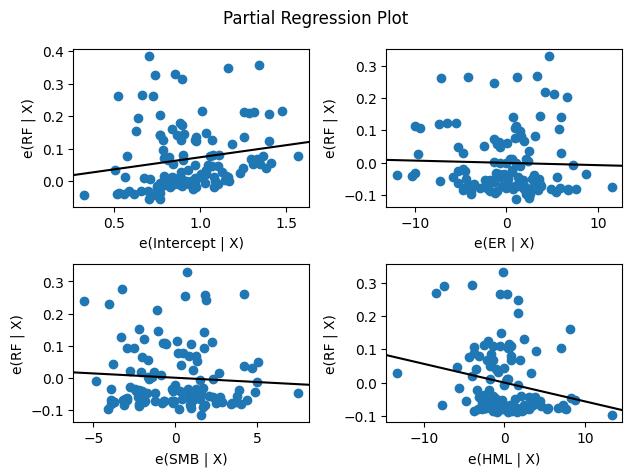

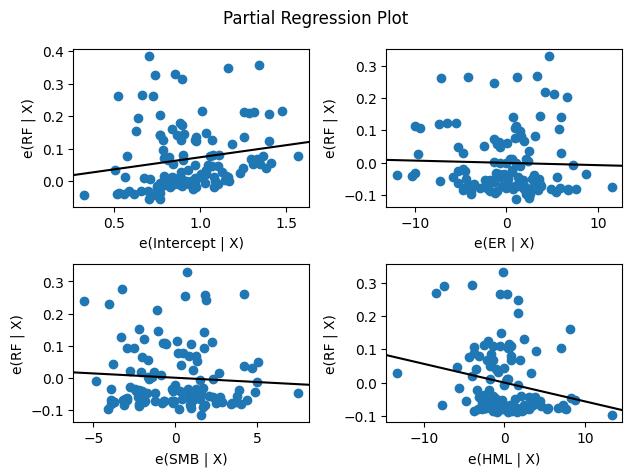

In [35]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)
fig

/var/folders/dx/m2j57nt536l3dbwgb3vxxlyw0000gn/T/ipykernel_6621/2601170919.py:2: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.0)


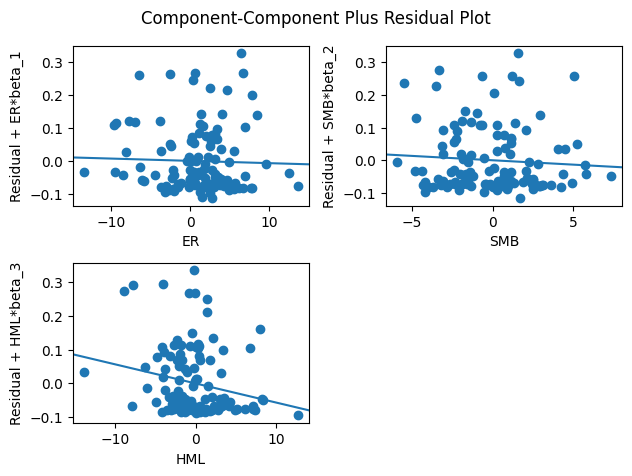

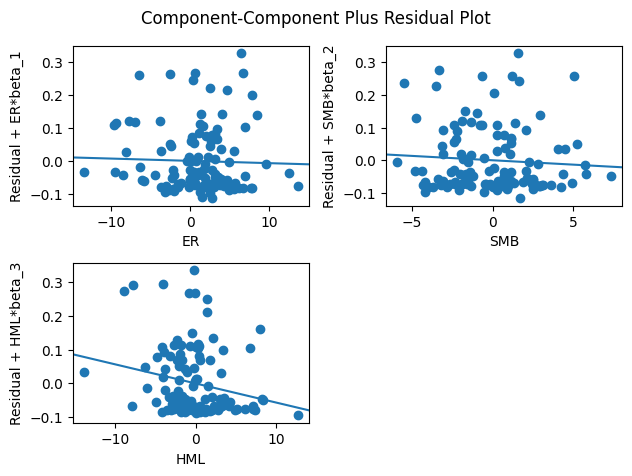

In [36]:
fig = sm.graphics.plot_ccpr_grid(model)
fig.tight_layout(pad=1.0)
fig